In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from arch import arch_model
%matplotlib inline
import seaborn as sns

C:\Users\vitin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [62]:
tick = wb.DataReader('ITSA4.SA', 'yahoo', '2019-1-1', '2020-5-14')['Adj Close']

In [63]:
ret = pd.DataFrame(np.diff(np.log(tick)))

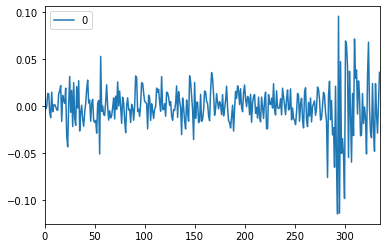

In [70]:
ret.plot()

In [65]:
model = arch_model(ret, mean='Zero', p=1, q=1, vol='Garch')

In [66]:
y = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: -867.7445874627815
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -867.744588450197
            Iterations: 5
            Function evaluations: 5
            Gradient evaluations: 1


C:\Users\vitin\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005331. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [67]:
yhat = y.forecast(horizon=5)

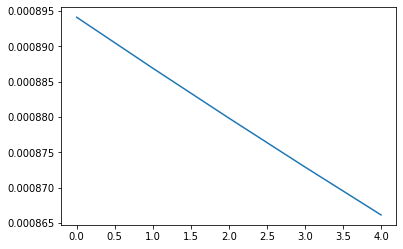

In [68]:
plt.plot(yhat.variance.values[-1, :])

In [61]:
yhat.variance.values[-1, :]

array([0.00064053, 0.00069241, 0.00074295, 0.00079218, 0.00084013])